# Time Series Analysis

## 1) Importing necessary libraries for time series analysis

In [1]:
import pandas as pd
import matplotlib.pylab as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA', FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',FutureWarning)
%matplotlib inline


## 2) Importing dataset for analysis using pandas library as a dataframe

In [2]:
df = pd.read_csv('GlobalLandTemperaturesByCity.csv', delimiter=',')
df.head(10)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country
0,1796-01-01,24.317,2.190,Colombo,Sri Lanka
1,1796-02-01,23.923,1.484,Colombo,Sri Lanka
2,1796-03-01,24.407,2.309,Colombo,Sri Lanka
3,1796-04-01,27.171,1.650,Colombo,Sri Lanka
4,1796-05-01,29.050,1.290,Colombo,Sri Lanka
5,1796-06-01,28.539,3.125,Colombo,Sri Lanka
6,1796-07-01,26.857,2.249,Colombo,Sri Lanka
7,1796-08-01,26.887,2.950,Colombo,Sri Lanka
8,1796-09-01,27.123,3.379,Colombo,Sri Lanka
9,1796-10-01,27.562,1.493,Colombo,Sri Lanka


## 3) Getting a basic description of the data

In [3]:
df.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,2508.000000,2508.000000
mean,26.631452,0.940125
std,1.608891,0.756954
min,21.010000,0.134000
25%,25.505000,0.380000
50%,26.865500,0.619500
75%,27.772750,1.388000
max,30.682000,5.807000


## 4) Dropping unnecessary data columns from the dataset

#### AverageTemperatureUncertainty - not required to be considred as it is the range of fluctuation for the readings 
#### City - Since all the data is for the city of Colombo
#### Country - Since all the data is for the country Sri Lanka

In [4]:
df = df.drop('AverageTemperatureUncertainty', axis=1)
df = df.drop('City', axis=1)
df = df.drop('Country',axis=1)


## 5) Converting dt column to date time format

In [5]:
df.index = pd.to_datetime(df.dt)
df = df.drop('dt', axis=1)

## 6) Handling null values

In [6]:
df[df.isnull()]

,AverageTemperature
dt,
1796-01-01,NaN
1796-02-01,NaN
1796-03-01,NaN
1796-04-01,NaN
1796-05-01,NaN
...,...
2013-05-01,NaN
2013-06-01,NaN
2013-07-01,NaN


In [7]:
len(df[df.isnull()])

2613

In [8]:
df = df.sort_index()

In [9]:
df.index

DatetimeIndex(['1796-01-01', '1796-02-01', '1796-03-01', '1796-04-01',
               '1796-05-01', '1796-06-01', '1796-07-01', '1796-08-01',
               '1796-09-01', '1796-10-01',
               ...
               '2012-12-01', '2013-01-01', '2013-02-01', '2013-03-01',
               '2013-04-01', '2013-05-01', '2013-06-01', '2013-07-01',
               '2013-08-01', '2013-09-01'],
              dtype='datetime64[ns]', name='dt', length=2613, freq=None)

### Replacing NaN values with the previous effective data

In [10]:
df.AverageTemperature.fillna(method='pad', inplace=True)

In [11]:
df[df.AverageTemperature.isnull()]

,AverageTemperature
dt,


In [12]:
df['Ticks'] = range(0,len(df.index.values))

## 7) Cheking if the data is stationary

In [13]:
def stationarity_check(ts):
    
    # Determing rolling statistics
    roll_mean = pd.Series(ts).rolling(window=12).mean()
    # Plot rolling statistics:
    plt.plot(ts, color='green',label='Original')
    plt.plot(roll_mean, color='blue', label='Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.show(block=False)
    
    # Perform Augmented Dickey-Fuller test:
    print('Augmented Dickey-Fuller test:')
    df_test = adfuller(ts)
    print("type of df_test: ",type(df_test))
    print("df_test: ",df_test)
    df_output = pd.Series(df_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    print("df_output: \n",df_output)
    for key,value in df_test[4].items():
        df_output['Critical Value (%s)'%key] = value
    print(df_output)

### Augmented Dickey-Fuller test at 5% significance level

#### H0 = Data is no stationary  H1 = Data is stationary

#### alpha = 0.05  p-value = 0.000159

#### Since p-value is less than alpha value we reject H0 at 5% significance level. Hence at 5% significance level the data are stationary

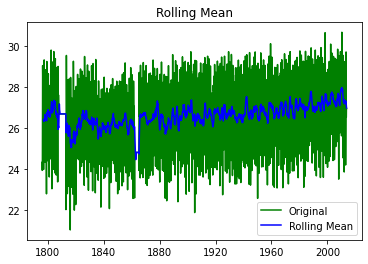

Augmented Dickey-Fuller test:
type of df_test:  <class 'tuple'>
df_test:  (-4.550471552157118, 0.00015922403226497232, 27, 2585, {'1%': -3.4328822265006687, '5%': -2.862658740388024, '10%': -2.5673655460943023}, 4861.732645713535)
df_output: 
 Test Statistic                   -4.550472
p-value                           0.000159
#Lags Used                       27.000000
Number of Observations Used    2585.000000
dtype: float64
Test Statistic                   -4.550472
p-value                           0.000159
#Lags Used                       27.000000
Number of Observations Used    2585.000000
Critical Value (1%)              -3.432882
Critical Value (5%)              -2.862659
Critical Value (10%)             -2.567366
dtype: float64


In [14]:
stationarity_check(df.AverageTemperature)

In [15]:
df.head()

,AverageTemperature,Ticks
dt,,
1796-01-01,24.317,0
1796-02-01,23.923,1
1796-03-01,24.407,2
1796-04-01,27.171,3
1796-05-01,29.050,4


## 8) Using AIC value to get p and q values

#### d value is 0 since the data is stationary and does not require any differencing

In [ ]:
import itertools
p = q = r = range(0, 4)
pqr = itertools.product(p, q , r)
for param in pqr:
    try:
        mod = ARIMA(df.AverageTemperature,order=param)
        results = mod.fit()
        print('ARMA{} - AIC:{}'.format(param, results.aic))
    except:
        continue

### Since ARMA(3,0,3) has the least AIC value (6390.950930672307) this is the best fit

## 9) Fitting the model

In [ ]:
model = ARIMA(df.AverageTemperature, order=(3,0,3))  
results_MA = model.fit()  
plt.plot(df.AverageTemperature)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('Fitting data _ MSE: %.2f'% (((results_MA.fittedvalues-df.AverageTemperature)**2).mean()))
plt.show()

## 10) Exporting the model as a pickle file for predictions

In [18]:
import pickle
# Writing different model files to file
with open( 'modelForIOT.sav', 'wb') as f:
    pickle.dump(results_MA,f)